<a href="https://colab.research.google.com/github/OrangeSunProgramming/brain-tumor-classification/blob/main/simple_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the libraries necessary for the DNN project
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Getting the training and validation dataset
image_height = 180
image_width = 180
batch_size = 32

dataset_dir = "/content/drive/MyDrive/brain_tumor_classification_dataset/brain_tumor_dataset/brain_tumor_classification/Training"
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir, validation_split=0.2, subset="training", seed=72, image_size=(image_height, image_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir, validation_split=0.2, subset="validation", seed=72, image_size=(image_height, image_width), batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [3]:
class_names = train_ds.class_names
print(f"The classes: {class_names}")

The classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


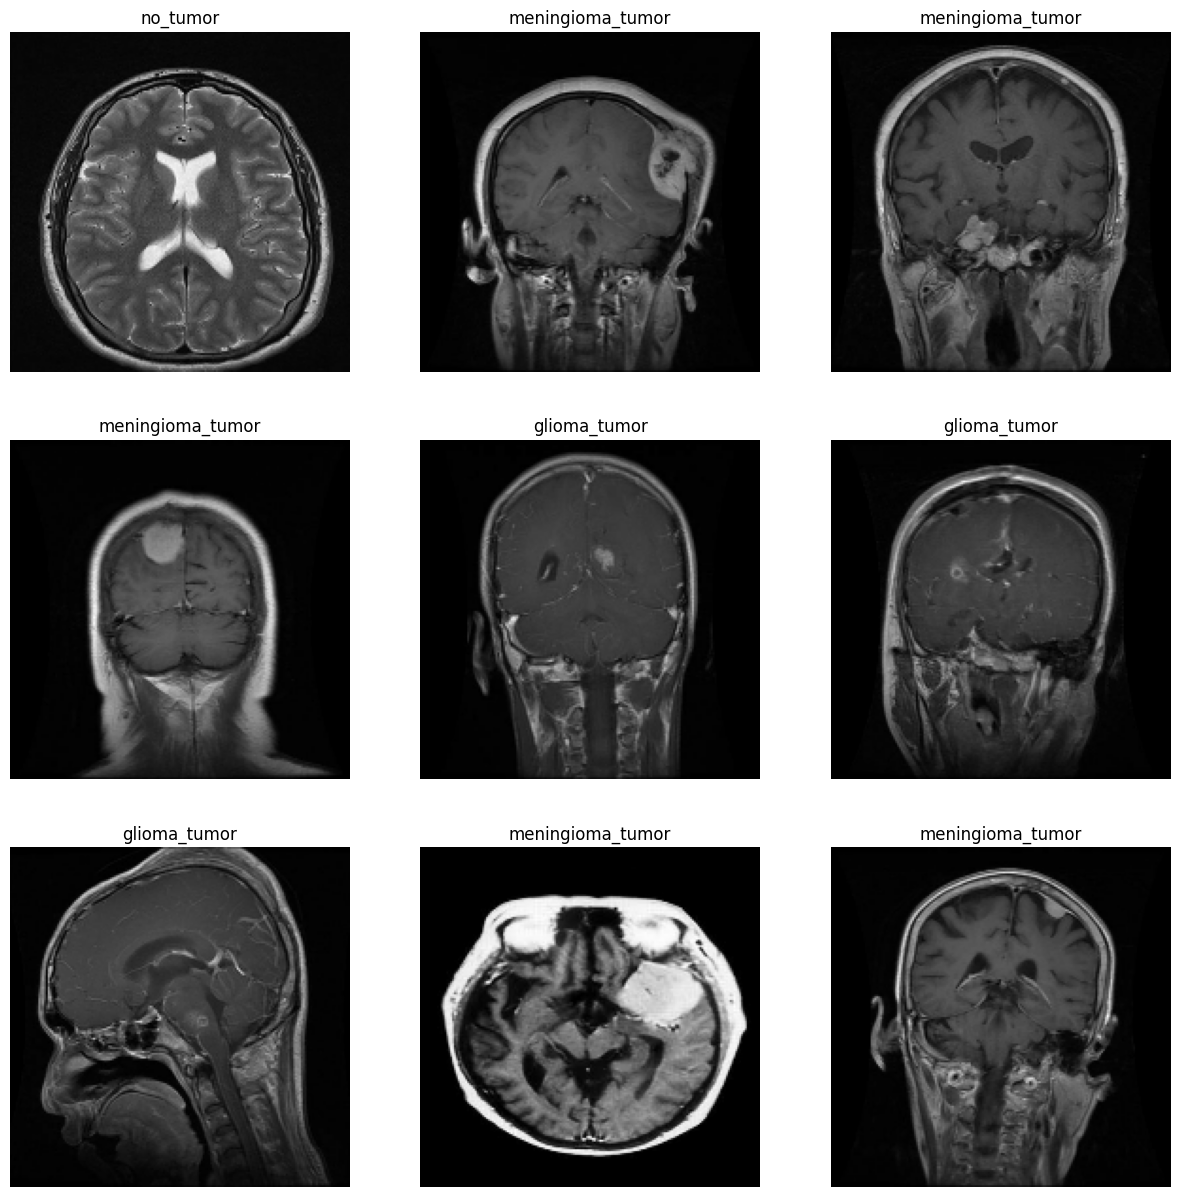

In [4]:
#Visualizing the dataset
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.savefig("/content/drive/MyDrive/brain_tumor_classification_dataset/Brain Tumor GitHub/dataset images example/brain_tumor_images_examples.png")

In [5]:
for image_batch, labels_batch in train_ds:
  print(f"Image batch shape: {image_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")
  break

Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


In [6]:
#Since we don't want I/O to become blocked then we will yield the data from disk.
# For this we use buffered prefetching

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
#Defining the CNN architecture using the Functional API
inputs = tf.keras.layers.Input(shape=(image_height, image_width, 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

simple_model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
simple_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

In [8]:
#Model's summary
simple_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,294,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,300,132 (31.66 MB)

 Trainable params: 8,300,132 (31.66 MB)

 Non-trainable params: 0 (0.00 B)

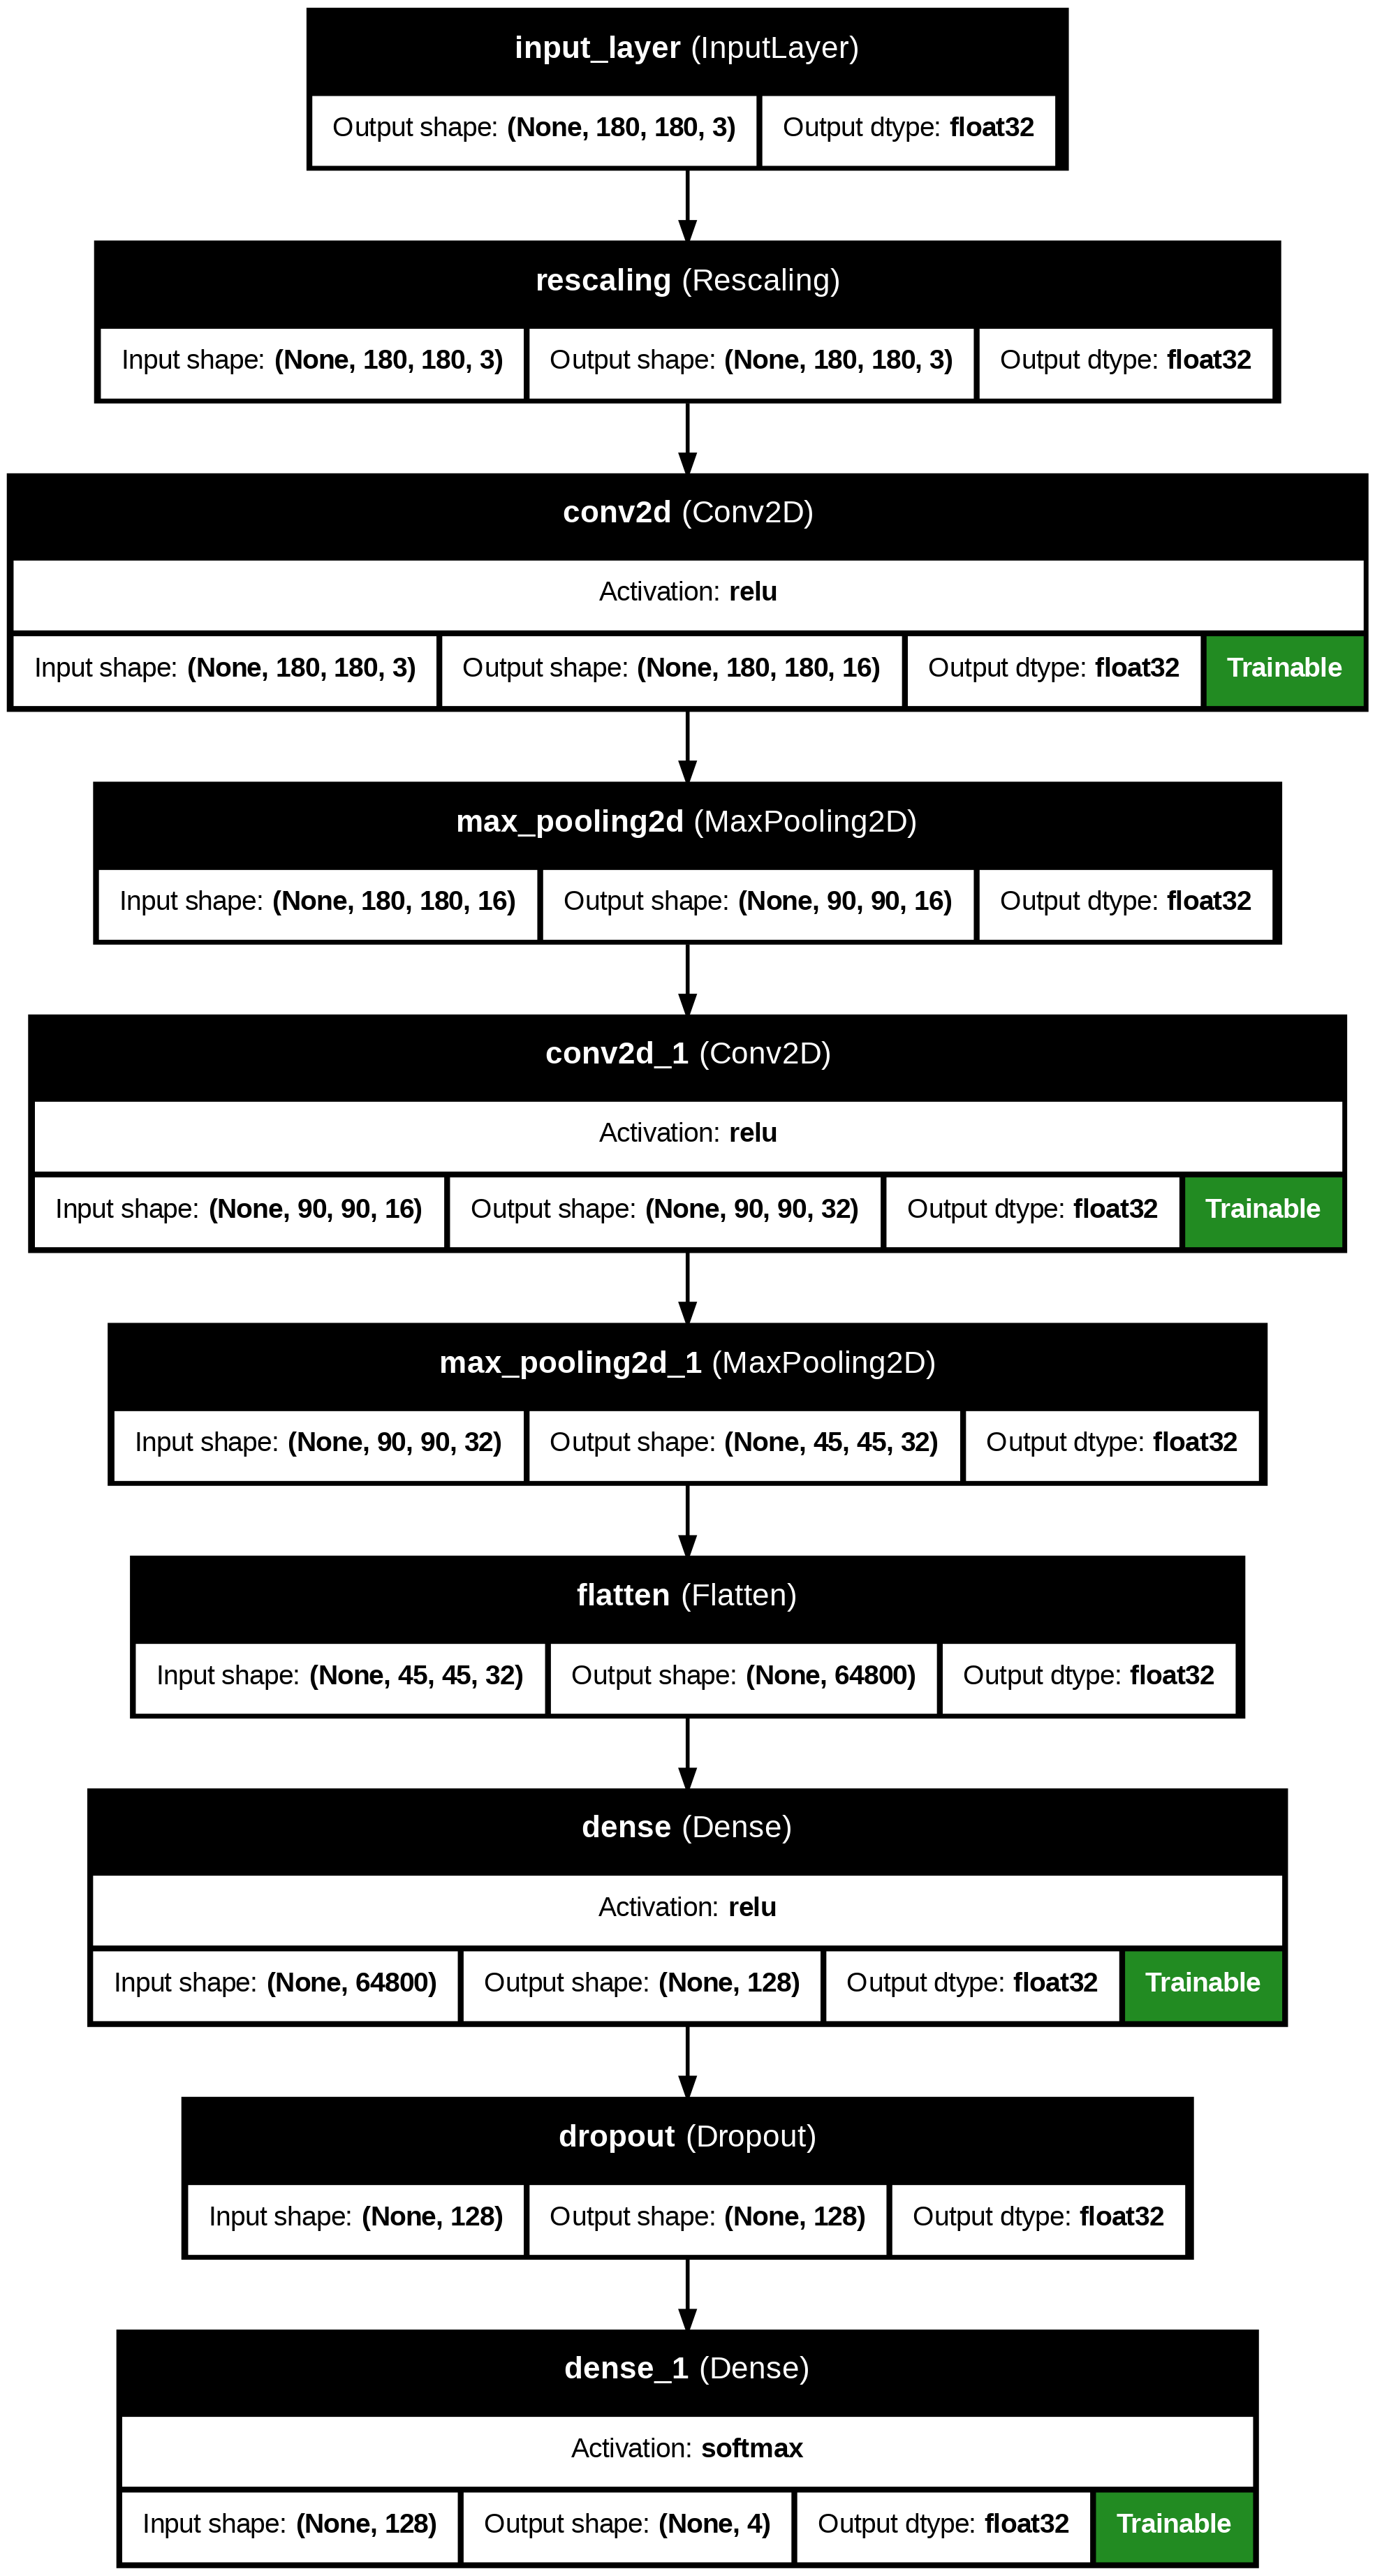

In [9]:
#Plot (simple model)
tf.keras.utils.plot_model(simple_model, to_file = "/content/drive/MyDrive/brain_tumor_classification_dataset/Brain Tumor GitHub/Simple Model/Model Architecture/simple_model_architecture.png", show_shapes=True, show_dtype=True, show_layer_activations=True, show_layer_names=True, rankdir="TB", dpi=200, show_trainable=True)

In [10]:
#Fitting the model (Training the model)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="auto")
simple_model_progress = simple_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.5054 - loss: 1.1748 - val_accuracy: 0.7422 - val_loss: 0.6326
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7930 - loss: 0.5257 - val_accuracy: 0.8153 - val_loss: 0.4472
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8986 - loss: 0.2925 - val_accuracy: 0.8502 - val_loss: 0.3964
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9260 - loss: 0.2088 - val_accuracy: 0.8763 - val_loss: 0.3010
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9512 - loss: 0.1495 - val_accuracy: 0.8850 - val_loss: 0.2918
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9664 - loss: 0.0919 - val_accuracy: 0.8902 - val_loss: 0.3810
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9731 - loss: 0.0854 - val_accuracy: 0.8990 - val_loss: 0.3113
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9769 - loss: 0.0682 - val_accuracy: 0

In [11]:
#Saving the training history
simple_model_history = pd.DataFrame(simple_model_progress.history)
simple_model_history.to_csv("/content/drive/MyDrive/brain_tumor_classification_dataset/Brain Tumor GitHub/Simple Model/Model Training History/simple_model_history.csv")

print("Training history saved!")

Training history saved!


In [12]:
#Evaluating the validation dataset
simple_model.evaluate(val_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.3405


[0.35265108942985535, 0.9094076752662659]

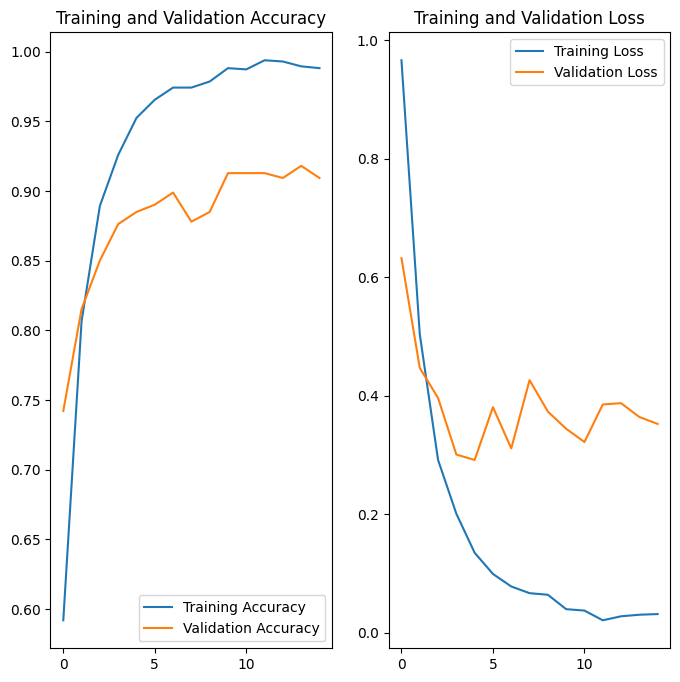

In [13]:
acc = simple_model_progress.history['accuracy']
val_acc = simple_model_progress.history['val_accuracy']

loss = simple_model_progress.history['loss']
val_loss = simple_model_progress.history['val_loss']

epochs_range = range(len(simple_model_progress.history["loss"]))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("/content/drive/MyDrive/brain_tumor_classification_dataset/Brain Tumor GitHub/Simple Model/Training and Validation Accuracy Loss/simple_model_graph.png")
plt.show()

In [14]:
path = "/content/drive/MyDrive/brain_tumor_classification_dataset/brain_tumor_dataset/brain_tumor_classification/Testing/meningioma_tumor/image(109).jpg"

img = tf.keras.utils.load_img(
    path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = simple_model.predict(img_array)
score = tf.nn.softmax(predictions[0])



print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[tf.math.top_k(score, k=2).indices.numpy()[0]], 100 * tf.math.top_k(score, k=2).values.numpy()[0])
)

print(" ")

print(
    "This image might also belong to {} with a {:.2f} percent confidence."
    .format(class_names[tf.math.top_k(score, k=2).indices.numpy()[1]], 100 * tf.math.top_k(score, k=2).values.numpy()[1])
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
This image most likely belongs to meningioma_tumor with a 47.53 percent confidence.
 
This image might also belong to no_tumor with a 17.49 percent confidence.


Found 394 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


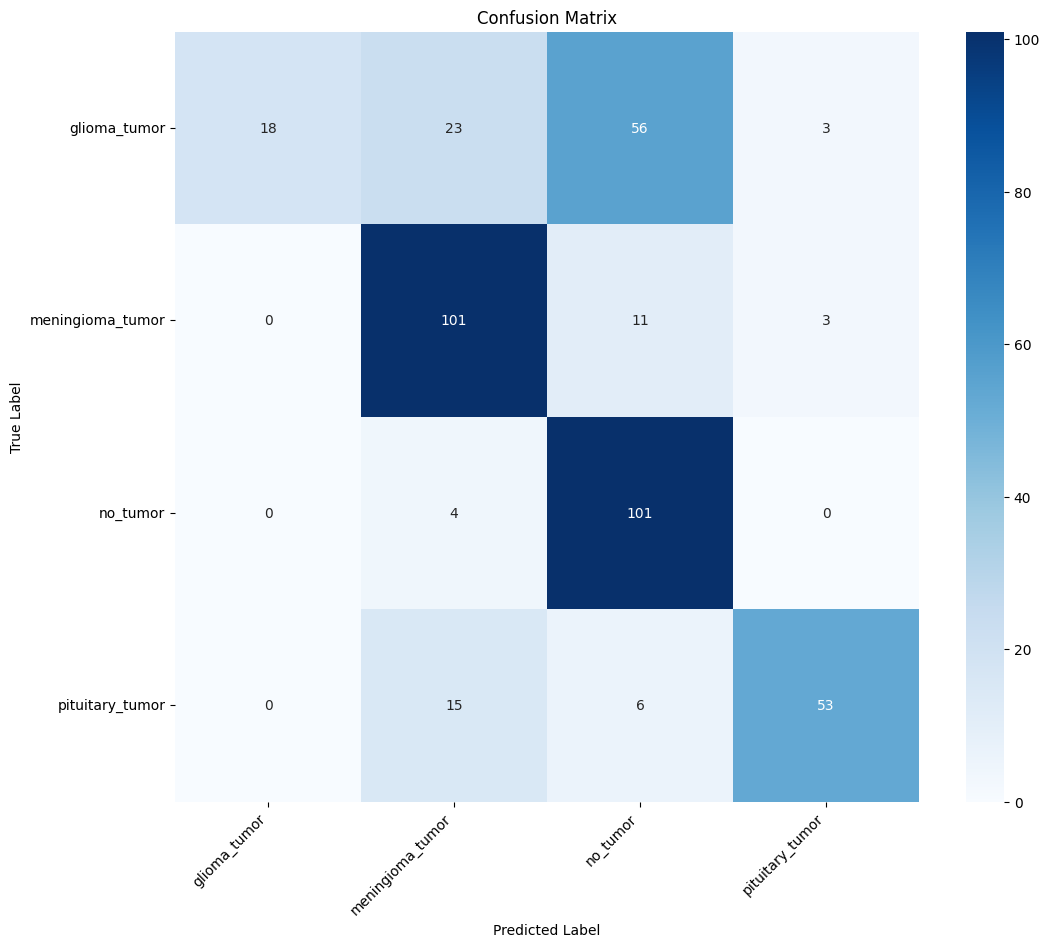

                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.18      0.31       100
meningioma_tumor       0.71      0.88      0.78       115
        no_tumor       0.58      0.96      0.72       105
 pituitary_tumor       0.90      0.72      0.80        74

        accuracy                           0.69       394
       macro avg       0.80      0.68      0.65       394
    weighted avg       0.78      0.69      0.65       394



In [15]:
#Load the testing dataset
test_dataset_dir = "/content/drive/MyDrive/brain_tumor_classification_dataset/brain_tumor_dataset/brain_tumor_classification/Testing"
test_ds = tf.keras.utils.image_dataset_from_directory(test_dataset_dir, image_size=(image_height, image_width), batch_size=batch_size)

#Get the true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    predictions = simple_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

#Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)

#Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig("/content/drive/MyDrive/brain_tumor_classification_dataset/Brain Tumor GitHub/Simple Model/simple_model_confusion_matrix.png")
plt.show()


from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)